In [79]:
from qiskit.quantum_info import SparsePauliOp


from qiskit.circuit.library import EfficientSU2

from qiskit_algorithms.optimizers import SPSA

import numpy as np

In [80]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session
QiskitRuntimeService.save_account(channel="ibm_quantum",token="5bdd6c2a73e84f421422bf22890663ce0c83b96215f059ce6d1af3d00218c1611418dc4cf86a33554518d39a5749435c45ecbe558d19ac2c3013ec978207840c",overwrite=True)
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_kyoto'

In [81]:
Hamiltonian = SparsePauliOp.from_list([("XZ", -2.0), ("ZX", -1.0), ("YY", 1.0), ("II", 1.0)])

ansatz = EfficientSU2(Hamiltonian.num_qubits, reps=1)

spsa = SPSA(maxiter=250)

x0 = 2* np.pi * np.random.rand(ansatz.num_parameters)


In [82]:
#analytical solution
from qiskit_algorithms import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=Hamiltonian)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")


Reference value: -1.00000


In [83]:
counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

    

In [84]:
from qiskit_algorithms.utils import algorithm_globals
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.primitives import Estimator


seed = 123
algorithm_globals.random_seed = seed

# options_dict = {
#     "default_shots": 1024,
#     "optimization_level": 1,
# }

In [85]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(target=backend.target,optimization_level=3)
ISA_ansatz = pm.run(ansatz)
ISA_Hamiltonian = Hamiltonian.apply_layout(layout=ISA_ansatz.layout)

In [86]:
from qiskit_algorithms import VQE

#local simulator

with Session(backend=backend) as session:
    # estimator = EstimatorV2(backend=backend)
    estimator = Estimator()

    vqe = VQE(
        estimator=estimator,
        ansatz=ansatz,
        optimizer=spsa,
        callback=store_intermediate_result,
    )
    result = vqe.compute_minimum_eigenvalue(operator=Hamiltonian)

print(f"VQE  {result.eigenvalue.real:.5f}")
print(f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}")



VQE  -0.99997
Delta from reference energy value is 0.00003


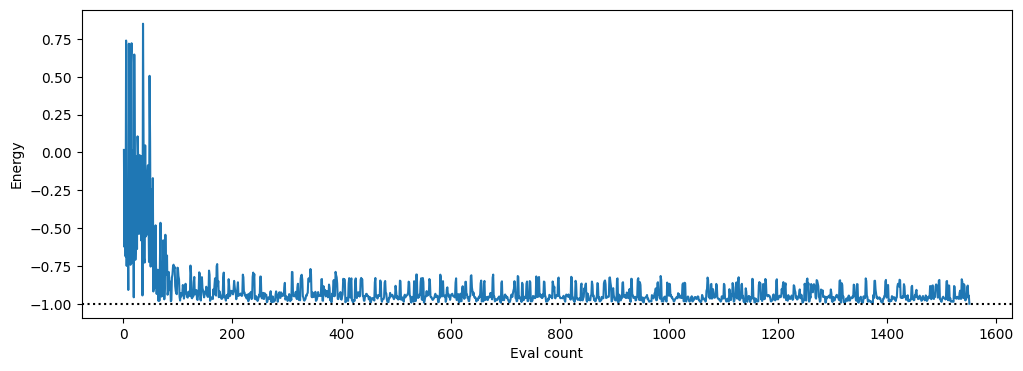

In [87]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts, values)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")

pylab.axhline(ref_value, color="black", linestyle="dotted")

In [88]:


# with Session(backend=backend) as session:
#     backend_estimator = BackendEstimator(backend=backend)
#     vqe = VQE(
#         estimator=backend_estimator,
#         ansatz=ansatz,
#         optimizer=spsa,
#         callback=store_intermediate_result,
#     )
#     result = vqe.compute_minimum_eigenvalue(operator=Hamiltonian)

# print(f"VQE  {result.eigenvalue.real:.5f}")
# print(f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}")
# #


In [89]:
# backend_estimator = BackendEstimator(backend=backend)
# vqe = VQE(
#     estimator=backend_estimator,
#     ansatz=ISA_ansatz,
#     optimizer=spsa,
#     callback=store_intermediate_result,
# )
# result = vqe.compute_minimum_eigenvalue(operator=ISA_Hamiltonian)

# print(f"VQE  {result.eigenvalue.real:.5f}")
# print(f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}")

In [90]:
from qiskit_ibm_runtime import QiskitRuntimeService,Estimator
from qiskit.primitives import BackendEstimator

counts = []
values = []

#real quantum hardware although it submits in multiple jobs

service = QiskitRuntimeService(channel="ibm_quantum",token="5bdd6c2a73e84f421422bf22890663ce0c83b96215f059ce6d1af3d00218c1611418dc4cf86a33554518d39a5749435c45ecbe558d19ac2c3013ec978207840c")
backend = service.least_busy(operational=True, simulator=False)
estimator = Estimator(backend=backend)
backend_estimator = BackendEstimator(backend=backend)

vqe = VQE(
    estimator=estimator,
    ansatz=ISA_ansatz,
    optimizer=spsa,
    callback=store_intermediate_result,
)
result = vqe.compute_minimum_eigenvalue(operator=ISA_Hamiltonian)

#if the job is completed, the result will be printed

print(f"VQE  {result.eigenvalue.real:.5f}")


KeyboardInterrupt: 

VQE  -0.99997
Delta from reference energy value is 0.00003


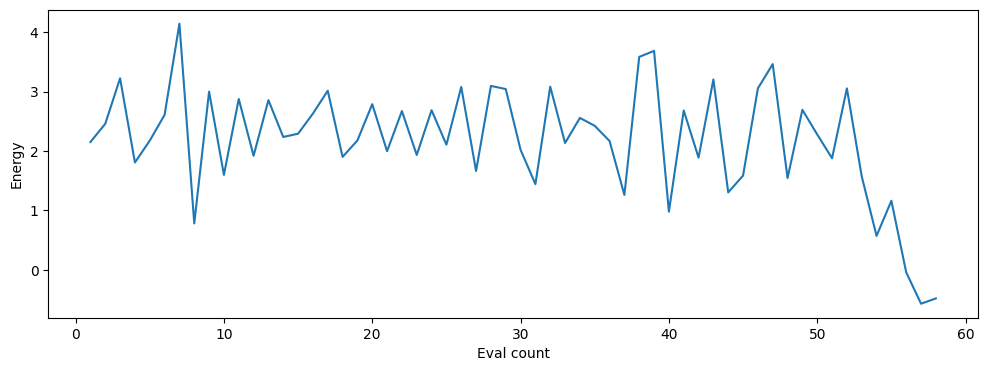

In [91]:
import pylab

#I ran out of time with IBMQ, get more in a week

pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts, values)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")

print(f"VQE  {result.eigenvalue.real:.5f}")
print(f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}")

pylab.show()

In [92]:
#make it a session so that it stops doing a thousand jobs at once
counts = []
values = []

#should theoretically submit in 1 job but I have not time right now with IBMQ

with Session(backend=backend) as session:
    estimator = Estimator(backend=backend)
    vqe = VQE(
        estimator=estimator,
        ansatz=ISA_ansatz,
        optimizer=spsa,
        callback=store_intermediate_result,
    )
    result = vqe.compute_minimum_eigenvalue(operator=ISA_Hamiltonian)

print(f"VQE  {result.eigenvalue.real:.5f}")
print(f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}")


    

/Users/jonahsachs/opt/miniconda3/envs/Q_new_env/lib/python3.8/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Your current pending jobs are estimated to consume 64.40367347810837 quantum seconds, but you only have 22 quantum seconds left in your monthly quota; therefore, it is likely this job will be canceled
  warnings.warn(warning_message)


KeyboardInterrupt: 